# Support Vector Classifier on Winequality Dataset

Pipeline of ML Model

1. Data Ingestion
2. EDA
3. Preprocessinga
4. Model Creation - SVM
5. Evalution --> Confusion matrix, performance matrix, auc, roc, precision, recall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
data.quality.value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='count'>

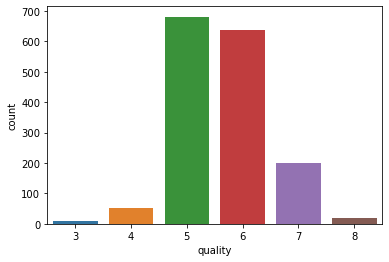

In [7]:
sns.countplot(x = data['quality'])

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Univarient Analysis

In [9]:
numerical_fea = data.select_dtypes(include=[np.number])
numerical_features = numerical_fea.columns
numerical_features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

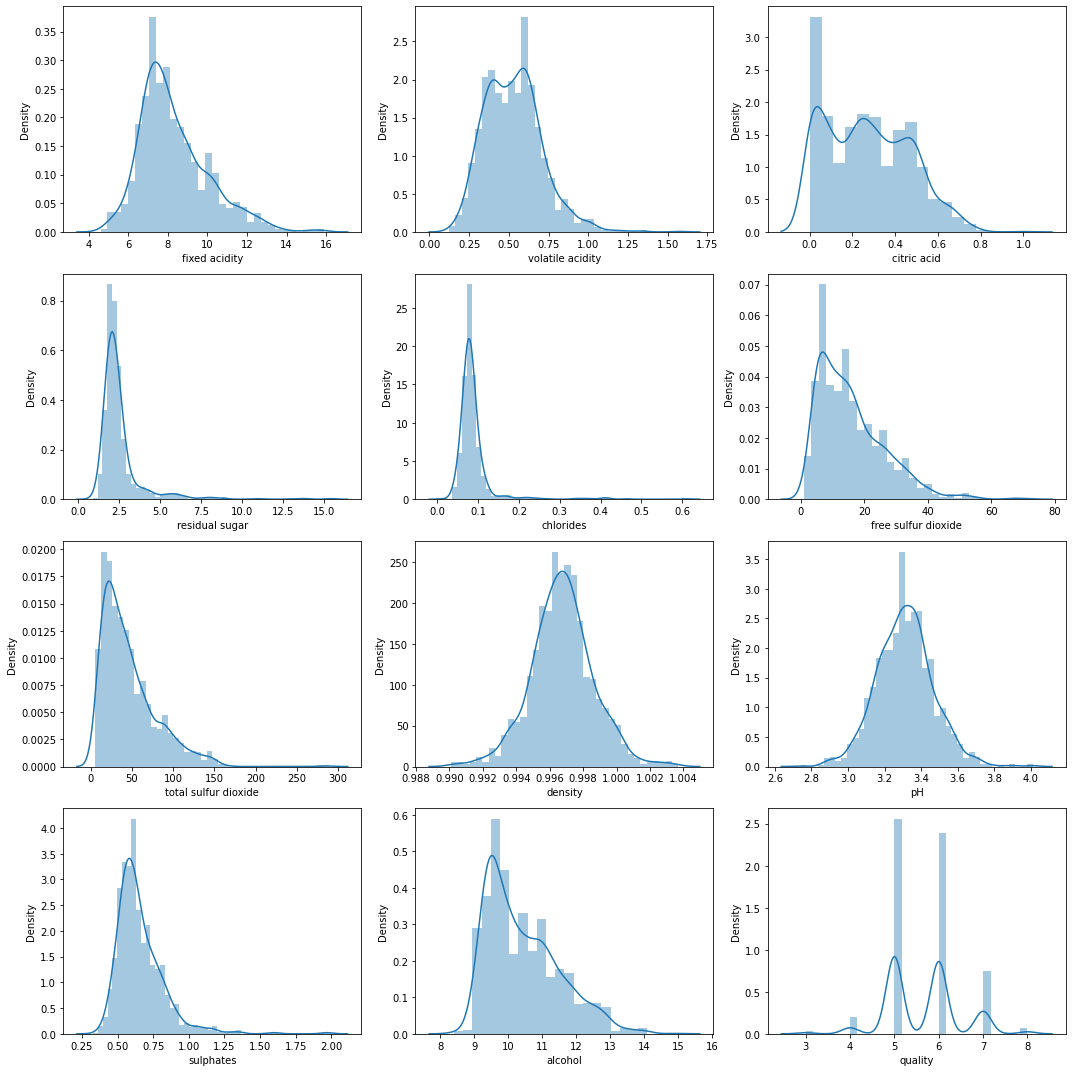

In [10]:
plt.figure(figsize=(15,15))
for i in range(0,len(numerical_features)):
    plt.subplot(4,3,i+1)
    sns.distplot(data[numerical_features[i]])
    plt.tight_layout()

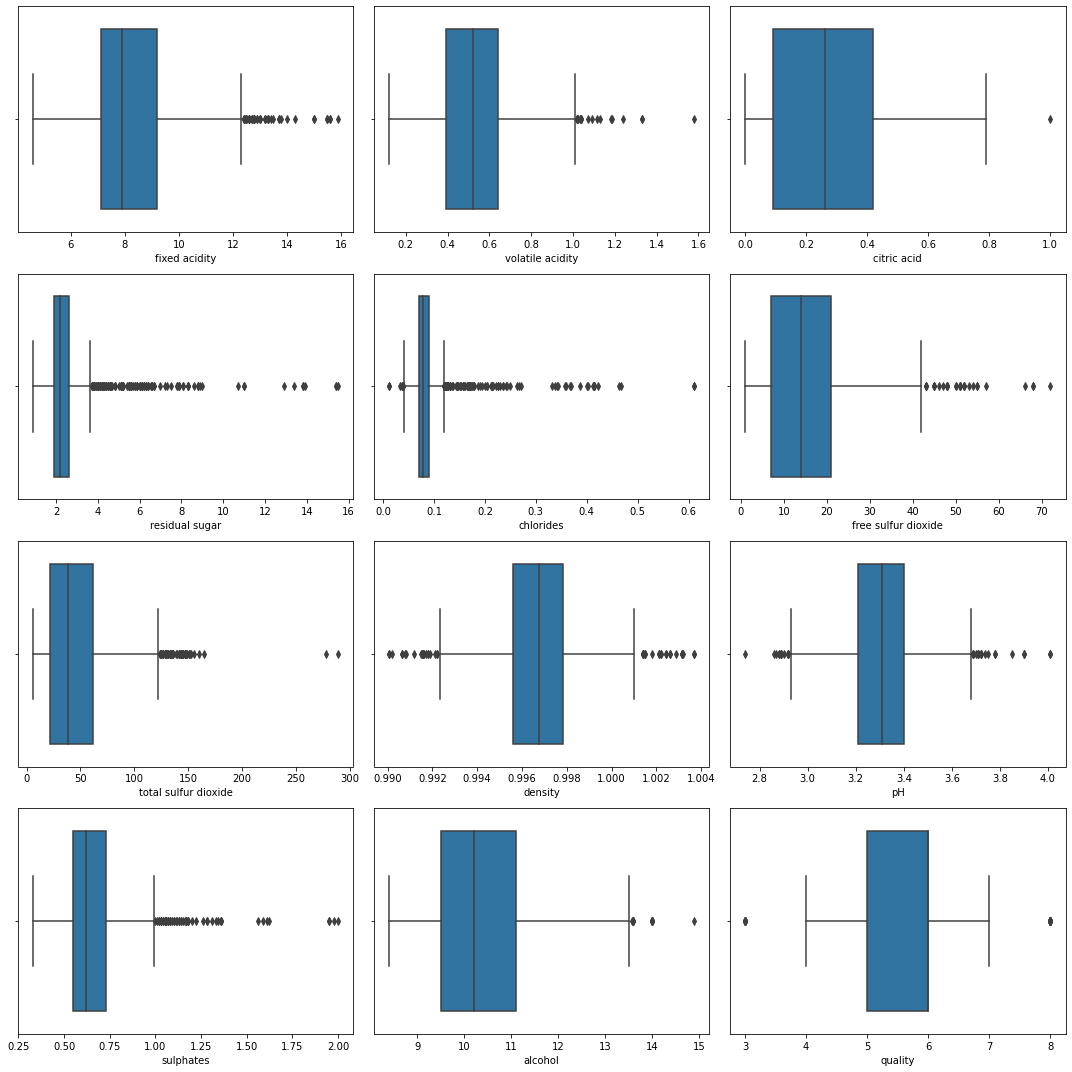

In [11]:
plt.figure(figsize=(15,15))
for i in range(0,len(numerical_features)):
    plt.subplot(4,3,i+1)
    sns.boxplot(data[numerical_features[i]])
    
    plt.tight_layout()

**Observation** :

 * **Outliers exist in this features :** 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'

# Bivariant Analysis

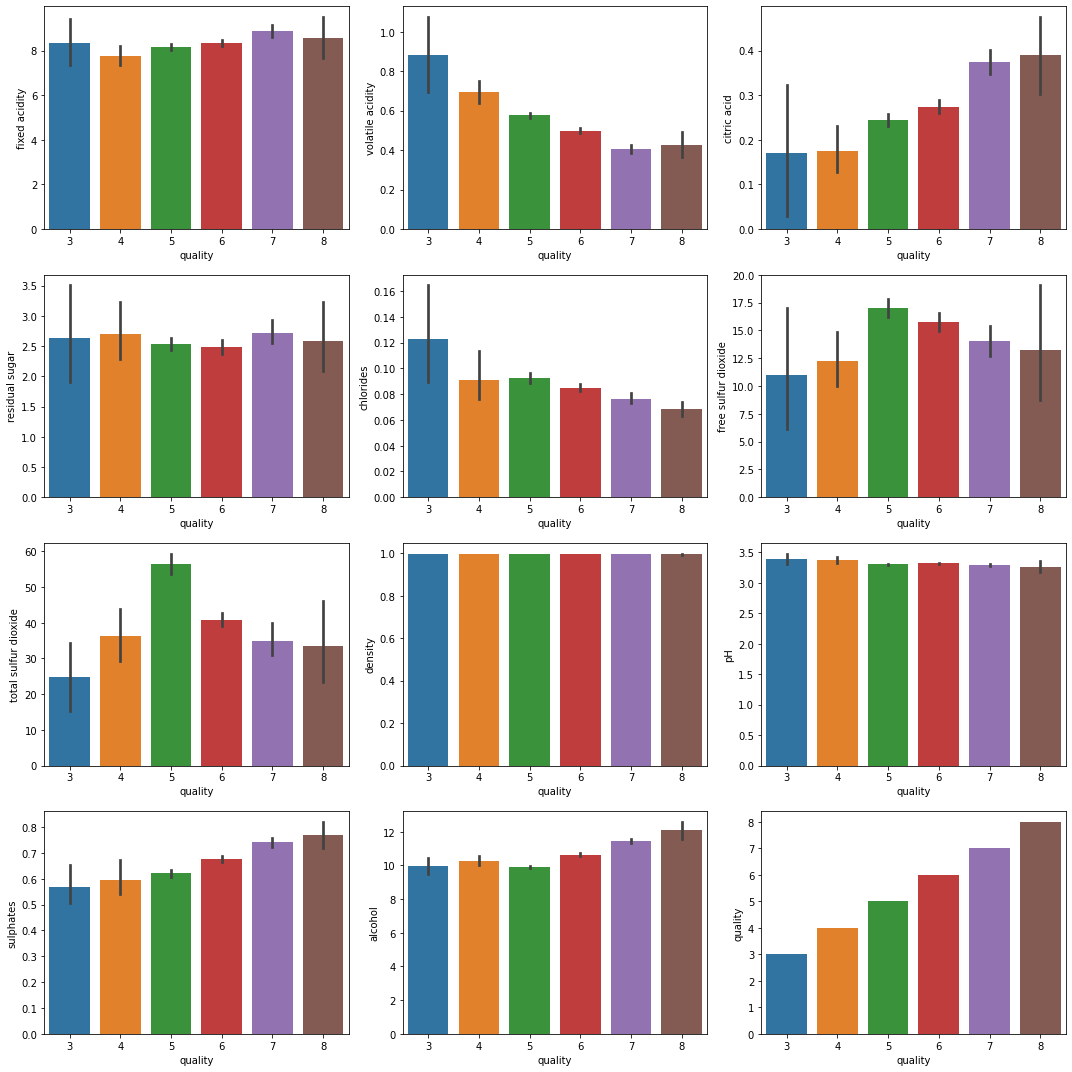

In [12]:
plt.figure(figsize=(15,15))
for i in range(len(numerical_features)):
    plt.subplot(4,3,i+1)
    sns.barplot(x='quality',y=numerical_features[i],data=data)
    
    plt.tight_layout()

**Observation:**
* volatile acidity, chlorides values decreasing Quality of Wine increasing
* citric acid, sulphates values increasing Quality of Wine decreasing

# Multivariant analysis

In [13]:
data[numerical_features].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [14]:
correlation = data[numerical_features].corr()
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<AxesSubplot:>

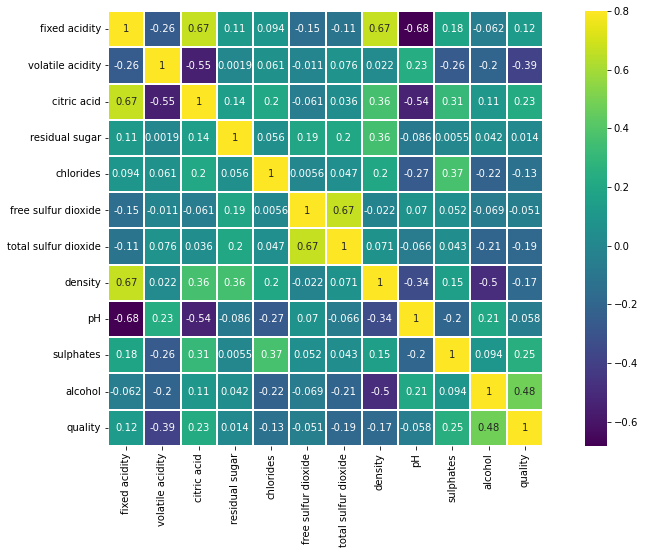

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(data=data[numerical_features].corr(),vmax=0.8,linewidths=0.01,square=True, annot=True,cmap='viridis',
           linecolor='white')

**Observation**
* features are not correlated with each other. No Multicolliniarity
* we need to consider all features for model creation

### LabelEncoding

In [16]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [17]:
#Now lets assign a labels to our quality variable
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()

In [18]:
#Bad becomes 0 and good becomes 1 
data['quality'] = label_quality.fit_transform(data['quality'])

In [19]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

### Independent and Dependent variables

In [20]:
X = data.drop("quality", axis=1)
y = data['quality']
X.shape, y.shape

((1599, 11), (1599,))

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [22]:
X_train.shape, X_test.shape

((1071, 11), (528, 11))

### Standardizing

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)

[ 8.30345472  0.53246499  0.26933707  2.54691877  0.08772736 15.91223156
 46.76330532  0.99677933  3.31453782  0.65881419 10.41521942]


In [24]:
X_train_tf = scaler.transform(X_train)

In [25]:
X_test_tf = scaler.transform(X_test)

### Model Building

In [26]:
from sklearn.svm import SVC
model = SVC()

In [27]:
model.fit(X_train_tf,y_train)

SVC()

In [28]:
model.score(X_train_tf,y_train)

0.9056956115779645

In [29]:
y_pred = model.predict(X_test_tf)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8806818181818182

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
confusion_matrix(y_test, y_pred)

array([[441,  10],
       [ 53,  24]], dtype=int64)

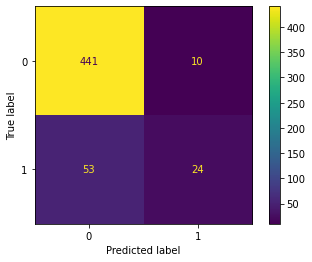

In [32]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       451
           1       0.71      0.31      0.43        77

    accuracy                           0.88       528
   macro avg       0.80      0.64      0.68       528
weighted avg       0.87      0.88      0.86       528



In [34]:
y_pred = list(model.predict(X_test))
predicted_df = {'predicted_values': y_pred, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
803,0,0
124,0,0
350,0,0
682,0,0
1326,0,0
976,0,0
1493,0,0
706,0,0
613,0,0
1587,0,0


# Hyperparameter tunning

In [35]:
svc = SVC()

In [36]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

In [37]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svc, param)

In [38]:
clf.fit(X_train_tf, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']})

In [39]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_gamma',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [40]:
clf.best_estimator_

SVC(C=1.4, gamma=0.8)

In [41]:
clf.best_params_

{'C': 1.4, 'gamma': 0.8, 'kernel': 'rbf'}

In [42]:
clf.best_score_

0.9066246468159097

## recreating model with Best Parameters obtained in Hyperparameter tunning

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [96]:
from sklearn.svm import SVC
model1 = SVC(C = 1.4, gamma= 0.8, kernel='rbf',probability=True)
model1.fit(X_train_tf,y_train)
ytrain_pred = model1.predict_proba(X_train_tf)
print('SVC train roc-auc score: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = model.predict_proba(X_test_tf)
print('SVC test roc-auc score: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

SVC train roc-auc score: 0.9995396654902562
SVC test roc-auc score: 0.8902870964955222


In [95]:
model1.predict_proba(X_train_tf)

array([[0.9453392 , 0.0546608 ],
       [0.94532956, 0.05467044],
       [0.94536241, 0.05463759],
       ...,
       [0.94564524, 0.05435476],
       [0.02349964, 0.97650036],
       [0.94536965, 0.05463035]])

In [87]:
pred=[]
pred.append(pd.Series(model1.predict_proba(X_test_tf)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('SVC test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

SVC test roc-auc: 0.8902583004578571


In [88]:
pd.concat(pred,axis=1)

,0
0,0.054657
1,0.066558
2,0.113660
3,0.058259
4,0.035551
...,...
523,0.066101
524,0.950800
525,0.976810
526,0.055560


In [89]:
final_prediction

0      0.054657
1      0.066558
2      0.113660
3      0.058259
4      0.035551
         ...   
523    0.066101
524    0.950800
525    0.976810
526    0.055560
527    0.065731
Length: 528, dtype: float64

In [90]:
#### Calculate the ROc Curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9859473 , 0.9859473 , 0.9764874 , 0.97646232, 0.93042694,
       0.90594682, 0.8973976 , 0.89437331, 0.820874  , 0.81365063,
       0.80210816, 0.79190122, 0.75711998, 0.75313592, 0.75115937,
       0.68796338, 0.67697537, 0.67245671, 0.65316543, 0.61788578,
       0.61780912, 0.60970923, 0.60745596, 0.53706283, 0.50957529,
       0.5       , 0.47713506, 0.46800048, 0.41141031, 0.39103447,
       0.38904124, 0.3461438 , 0.34229188, 0.31289885, 0.31102237,
       0.30868657, 0.29154697, 0.28903103, 0.27826214, 0.27405461,
       0.26270911, 0.26039722, 0.25979101, 0.24399529, 0.23158919,
       0.22660345, 0.17715056, 0.17683587, 0.1625759 , 0.15762674,
       0.15631675, 0.15544064, 0.15518418, 0.15438679, 0.1507949 ,
       0.14459906, 0.14219447, 0.13560122, 0.12895134, 0.12440653,
       0.11561199, 0.11549013, 0.11507387, 0.11500777, 0.11387701,
       0.11374335, 0.11365968, 0.11328665, 0.11107035, 0.10996618,
       0.10736141, 0.10703061, 0.10684347, 0.10452282, 0.10404

In [91]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
38,0.278262,0.895833
45,0.226603,0.893939
44,0.231589,0.893939
42,0.259791,0.893939
40,0.262709,0.893939


In [92]:
accuracy_ls

,thresholds,accuracy
38,0.278262,0.895833
45,0.226603,0.893939
44,0.231589,0.893939
42,0.259791,0.893939
40,0.262709,0.893939
...,...,...
119,0.032105,0.185606
120,0.030161,0.183712
121,0.028584,0.174242
122,0.027493,0.172348


In [93]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

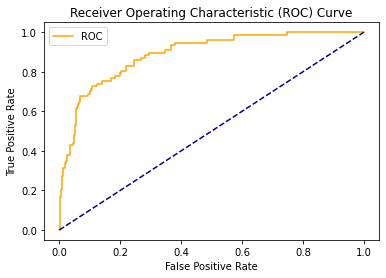

In [94]:
plot_roc_curve(fpr,tpr)